In [1]:
import cv2
import matplotlib.pyplot as plt
import time


In [2]:
#OpenCV reads img as GBR so we need to convert it to RGB for usage with 
#functions in other libraries
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
test1 = cv2.imread('ashley.jpg')
gray_img = cv2.cvtColor(test1,cv2.COLOR_BGR2GRAY)

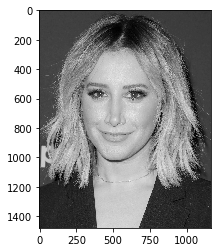

In [4]:
plt.imshow(gray_img, cmap='gray')

In [5]:
haar_face_cascade =  cv2.CascadeClassifier('/Users/nancyscarlet/opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_default.xml')
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1,minNeighbors=5)

print('Faces found: ',len(faces))

Faces found:  1


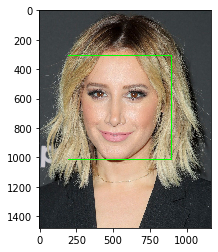

In [6]:
for (x,y,w,h) in faces:
    cv2.rectangle(test1, (x,y), (x+w,y+h), (0,255,0), 2)

plt.imshow(convertToRGB(test1))

In [7]:
def detect_faces(f_cascade, img, scaleFactor):
    img_copy = img.copy()
    gray_img = cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)
    faces = f_cascade.detectMultiScale(gray_img, scaleFactor=scaleFactor,minNeighbors=5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img_copy, (x,y), (x+w,y+h), (0,255,0), 2)
        
    return img_copy

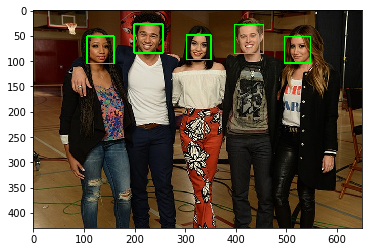

In [8]:
test2 = cv2.imread('hsm.jpg')
f2=detect_faces(haar_face_cascade, test2,1.2)
plt.imshow(convertToRGB(f2))

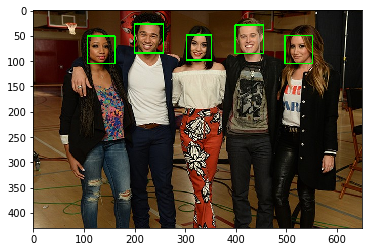

In [9]:
test2 = cv2.imread('hsm.jpg')
lbp_face_cascade = cv2.CascadeClassifier('/Users/nancyscarlet/opt/anaconda3/lib/python3.7/site-packages/cv2/data/lbpcascade_frontalface.xml')
f3=detect_faces(lbp_face_cascade, test2,1.1)
plt.imshow(convertToRGB(f3))

## Haar vs LBP Analysis

In [10]:
haar_face_cascade =  cv2.CascadeClassifier('/Users/nancyscarlet/opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_default.xml')
lbp_face_cascade = cv2.CascadeClassifier('/Users/nancyscarlet/opt/anaconda3/lib/python3.7/site-packages/cv2/data/lbpcascade_frontalface.xml')

img1 = cv2.imread('hsm.jpg')
img2 = cv2.imread('ashley.jpg')


In [11]:
t1= time.time()

haarimg = detect_faces(haar_face_cascade,img1,1.2)

t2= time.time()

dt1 = t2-t1
print('Time for haar classifier ')
print(dt1)

Time for haar classifier 
0.11948800086975098


In [12]:
t1= time.time()

lbpimg = detect_faces(lbp_face_cascade,img1,1.2)

t2= time.time()

dt2 = t2-t1
print('Time for haar classifier ' )
print(dt2)

Time for haar classifier 
0.047309160232543945


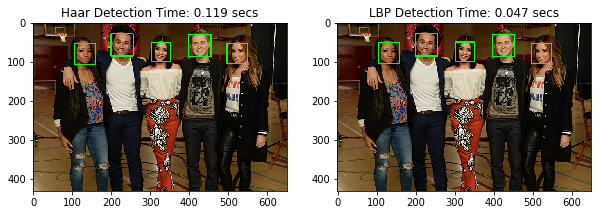

In [13]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.set_title('Haar Detection Time: '+str(round(dt1,3))+ ' secs')
ax1.imshow(convertToRGB(haarimg))
ax2.set_title('LBP Detection Time: '+str(round(dt2,3))+ ' secs')
ax2.imshow(convertToRGB(lbpimg))


1. Haar detected more faces than LBP
2. LBP is faster than Haar

### Simple Face detector using OpenCV-plot with Opencv

In [14]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('/Users/nancyscarlet/opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/nancyscarlet/opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_eye.xml')

In [15]:
img = cv2.imread('/Users/nancyscarlet/Desktop/ashley.jpg')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img = cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()